# Exploratory Data Analysis

Import the data set 

In [3]:
from sklearn import datasets

wine_data = datasets.load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

# Visualize and Preprocess Data

I will now check the shapes of the 'data' and target' fields

In [4]:
X = wine_data['data']
y = wine_data['target']

print('data.shape\t',X.shape,
      '\ntarget.shape \t',y.shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


With this it is confirmed that there are 178 samples (rows) and 13 feaures (columns)
I will now build a pandas DataFrame, to hold the data so that we can visualize the dataset into a tabular form.

In [5]:
import numpy as np
import pandas as pd

datawine = pd.DataFrame(data= np.c_[X,y],columns= wine_data['feature_names'] + ['target'])
datawine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


With this DataFrame I can check for any missing values.

In [6]:
datawine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

This confirms that there are no missing values and categorical data
The final step to data preprocessing is Feature Scaling. This is done by importing StandardScaler from sklearn.preprocessing. 


In [7]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()
X= st_x.fit_transform(X)

### What is Scaling? 
Scaling is a form of standardizing your data. Standardizing the features ensures that they have the same scale. This is important because many machine learning algorithms perform better or converge faster when the input features are on a similar scale.Standardizing the features ensures that they have the same scale. This is important because many machine learning algorithms perform better or converge faster when the input features are on a similar scale.
### Why Scale your data? 

- Algorithms that rely on distance measurements (such as K-Nearest Neighbors, Support Vector Machines, and many others) can be significantly affected by the scale of the input features. Features with larger scales can dominate the distance calculations and bias the model.Algorithms that rely on distance measurements (such as K-Nearest Neighbors, Support Vector Machines, and many others) can be significantly affected by the scale of the input features. Features with larger scales can dominate the distance calculations and bias the model.

- Standardized features allow for easier comparison of feature importance and effect sizes across different features.Standardized features allow for easier comparison of feature importance and effect sizes across different features.

## Correlation 





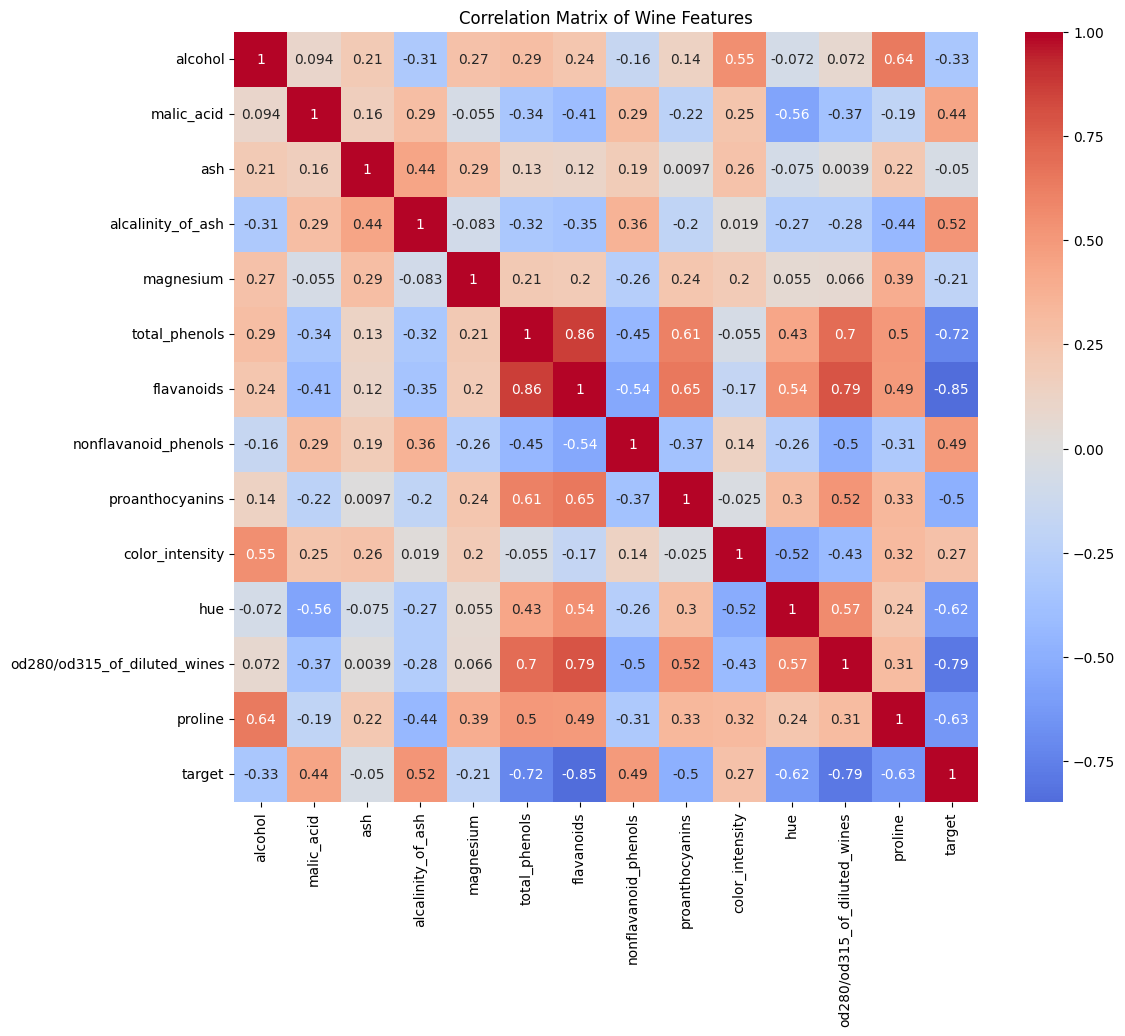

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = datawine.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Wine Features')
plt.show()


# Split Data For Training & Testing

To train and test our model effectively, we must first separate the data into a training set, which we will feed to our model along with the training labels. The model will then be tested on the 'test' data after it has been trained to determine its real-world applicability.

The train test split() method in Scikit-learn comes in handy here. test size specifies how much data is set aside for testing. We want to train our model on enough data to make good predictions, but we also need enough test data to see if we've overfitted the model. Therefore I will choose to test with 20% of the data. This means 80% of data will used for training.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



# Decision Tree

I will first create a decision tree classifier object and define a parameter grid for parameter tuning.
For the param_grid argument, I created a dictionary and chose 3 parameters used in the Decision Tree Classifer.
max-depth for the maximum depth of the tree - default (none)
min_samples_split for minimum number of samples required to split an internal node - default (2)
min_samples_leaf for minimum number of samples required to be at a leaf node - default (1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2,3,4,5,6,7],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [1,2,3,4]
}

I created a GridSearchCV object and included the estimator, the param_grid and set the K-fold Cross Validation to 5 which is the default for determining the cross-validation splitting strategy. Then I Fit the GridSearchCV object to the training data.

In [15]:
dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [16]:
print("Best parameters: ", dt_grid.best_estimator_)
print("Best parameters: ", dt_grid.best_params_)

Best parameters:  DecisionTreeClassifier(max_depth=3)
Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


As shown above, the Max_depth is chosen as 3. An increasing depth makes a tree model more expressive but a tree too deep will overfit the data, so 3 is good enough for the depth.
Min_samples_leaf is chosen as 1 which is the default value.
Min_samples_split is chosen as 2 which is the default value.
Then the best estimator object is fit to the training data, and the classifier is evaluated.

In [17]:
from sklearn import metrics

best_dt = dt_grid.best_estimator_
best_dt.fit(X_train, y_train)
y_train_pred_dt = best_dt.predict(X_train)
y_pred_dt = best_dt.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_train_pred_dt)
print("DT acc_train: %f" %acc_train )
acc = metrics.accuracy_score(y_test, y_pred_dt)
print("DT acc: %f" %acc )

DT acc_train: 0.992958
DT acc: 0.944444


The accuracy score in % for Decision Tree is 94.4

In [18]:
recall_train = metrics.recall_score(y_train, y_train_pred_dt, average=None)
print("DT recall_train: ", recall_train )
recall = metrics.recall_score(y_test, y_pred_dt, average=None)
print("DT recall: "  ,recall )

DT recall_train:  [0.97777778 1.         1.        ]
DT recall:  [0.92857143 1.         0.875     ]


The recall score is 1 which is the best for class_1 and then followed by class_0 but the score is low for class_2.

In [19]:
prec_train = metrics.precision_score(y_train, y_train_pred_dt, average=None)
print("DT precision_train:", prec_train )
prec = metrics.precision_score(y_test, y_pred_dt, average=None)
print("DT precision:", prec )

DT precision_train: [1.         0.98275862 1.        ]
DT precision: [1.    0.875 1.   ]


The precision score is 1 which is the best for class_2 and class_0 and 0.875 for class_1 respectively.

In [20]:
f1_train = metrics.f1_score(y_train, y_train_pred_dt, average=None)
print("DT f1 train:", f1_train )
f1 = metrics.f1_score(y_test, y_pred_dt, average=None)
print("DT f1:", f1 )

DT f1 train: [0.98876404 0.99130435 1.        ]
DT f1: [0.96296296 0.93333333 0.93333333]


The F1 score is best in class_0, followed by decent scores in both class_1 and class_2.

In [21]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_dt)
print("DT conf_mat: %f")
print(conf_mat)

DT conf_mat: %f
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


Based on all the scores a classification report can be generated for the Decision Tree Classification Model.

In [22]:
print("Decision Tree Classification Report:\n", metrics.classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9286    0.9630        14
           1     0.8750    1.0000    0.9333        14
           2     1.0000    0.8750    0.9333         8

    accuracy                         0.9444        36
   macro avg     0.9583    0.9345    0.9432        36
weighted avg     0.9514    0.9444    0.9449        36



# Random Forest

I will first create a random classifier object and define a parameter grid for parameter tuning.
For the param_grid argument, I created a dictionary and chose 3 parameters used in the Random Forest Classifer.
criterion to measure the quality of a split - default (gini)
max-depth for the maximum depth of the tree - default (none)
n-estimators for the number of trees in the forest - default (100)

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid1 = {
    'n_estimators': [10,30,50, 100, 150,200,300],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

I created a GridSearchCV object and included the estimator, the param_grid and set the K-fold Cross Validation to 5 which is the default for determining the cross-validation splitting strategy. Then I Fit the GridSearchCV object to the training data.

In [24]:
grid_search = GridSearchCV(clf, param_grid=param_grid1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 30, 50, 100, 150, 200, 300]})

In [25]:
print("Best parameters: ", grid_search.best_estimator_)
print("Best parameters:", grid_search.best_params_)

Best parameters:  RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10)
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}


As shown above, the criterion is chosen as entropy which is not the default (Gini).
Max_depth is chosen as 5. An increasing depth makes a tree model more expressive but a tree too deep will overfit the data, so 5 is good enough for the depth.
N_estimators is chosen as 100 which is the default value. Increasing the number of trees can improve the performance of the classifier but also increases the computational cost.
Then the best estimator object is fit to the training data, and the classifier is evaluated.

In [26]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_train_pred_rf = best_rf.predict(X_train)
y_pred_rf = best_rf.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_train_pred_rf)
print("RF acc_train: %f" %acc_train )
acc = metrics.accuracy_score(y_test, y_pred_rf)
print("RF acc: %f" %acc )

RF acc_train: 0.992958
RF acc: 0.972222


The accuracy score for Random Forest Classifier in % is 100, which is absolute accuracy

In [27]:
recall_train = metrics.recall_score(y_train, y_train_pred_rf, average=None)
print("RF recall_train:", recall_train )
recall = metrics.recall_score(y_test, y_pred_rf, average=None)
print("RF recall:", recall )

RF recall_train: [1.         0.98245614 1.        ]
RF recall: [1.         0.92857143 1.        ]


The recall scores are best in all classes.

In [28]:
prec_train = metrics.precision_score(y_train, y_train_pred_rf, average=None)
print("RF precision_train:", prec_train )
prec = metrics.precision_score(y_test, y_pred_rf, average=None)
print("RF precision:", prec )

RF precision_train: [0.97826087 1.         1.        ]
RF precision: [1.         1.         0.88888889]


The precision scores are best in all classes.

In [29]:
f1_train = metrics.f1_score(y_train, y_train_pred_rf, average=None)
print("RF f1 train:", f1_train )
f1 = metrics.f1_score(y_test, y_pred_rf, average=None)
print("RF f1:", f1 )

RF f1 train: [0.98901099 0.99115044 1.        ]
RF f1: [1.         0.96296296 0.94117647]


The F1 scores are best in all classes.

In [30]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_rf)
print("RF conf_mat:")
print(conf_mat)

RF conf_mat:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


Based on all the scores a classification report can be generated for the Random Forest Classification Model.

In [31]:
print("Random Forest Classification Report:\n", metrics.classification_report(y_test, y_pred_rf, digits=4))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     1.0000    0.9286    0.9630        14
           2     0.8889    1.0000    0.9412         8

    accuracy                         0.9722        36
   macro avg     0.9630    0.9762    0.9680        36
weighted avg     0.9753    0.9722    0.9725        36



# SVM

I will first create a SVC classifier object and define a parameter grid for parameter tuning.
For the param_grid argument, I created a dictionary and chose 3 parameters used in the Decision Tree Classifer.
C is a Regularization parameter - default (1)
kernel Specifies the kernel type to be used in the algorithm - default (rbf)
gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ - default(scale)

In [32]:
from sklearn.svm import SVC

svmc = SVC()

param_grid2 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

I created a GridSearchCV object and included the estimator, the param_grid and set the K-fold Cross Validation to 5 which is the default for determining the cross-validation splitting strategy. Then I Fit the GridSearchCV object to the training data.

In [33]:
grid_search2 = GridSearchCV(svmc, param_grid=param_grid2, cv=5)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [34]:
print("Get parameters: ", grid_search2.best_estimator_)
print("Best parameters:", grid_search2.best_params_)

Get parameters:  SVC(C=1, kernel='sigmoid')
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


As shown above, the C value is chosen as 1 which is the default value.
Kernel is sigmoid so this function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons.
Gamma is chosen as scale which is the default value.
Then the best estimator object is fit to the training data, and the classifier is evaluated.

In [35]:
best_svc = grid_search2.best_estimator_
best_svc.fit(X_train, y_train)
y_train_pred_svc = best_svc.predict(X_train)
y_pred_svc = best_svc.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_train_pred_svc)
print("SVC acc_train:", acc_train )
acc = metrics.accuracy_score(y_test, y_pred_svc)
print("SVC acc:", acc )

SVC acc_train: 0.9788732394366197
SVC acc: 0.9722222222222222


The accuracy score for SVC in % is 97.2

In [36]:
recall_train = metrics.recall_score(y_train, y_train_pred_svc, average=None)
print("SVC recall_train:", recall_train )
recall = metrics.recall_score(y_test, y_pred_svc, average=None)
print("SVC recall:", recall )

SVC recall_train: [1.         0.94736842 1.        ]
SVC recall: [1.         0.92857143 1.        ]


The recall score is best with class_0 and class_2, and decent with class_1.

In [37]:
prec_train = metrics.precision_score(y_train, y_train_pred_svc, average=None)
print("SVC precision_train:", prec_train )
prec = metrics.precision_score(y_test, y_pred_svc, average=None)
print("SVC precision:", prec )

SVC precision_train: [0.97826087 1.         0.95238095]
SVC precision: [1.         1.         0.88888889]


The precision score is best with class_0 and class_1, however low with class_2.

In [38]:
f1_train = metrics.f1_score(y_train, y_train_pred_svc, average=None)
print("SVC f1 train:", f1_train )
f1 = metrics.f1_score(y_test, y_pred_svc, average=None)
print("SVC f1:", f1 )

SVC f1 train: [0.98901099 0.97297297 0.97560976]
SVC f1: [1.         0.96296296 0.94117647]


The F1 score is best with class_0, followed by class_1 and finally class_2.

In [39]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_svc)
print("SVC conf_mat: %f")
print(conf_mat)

SVC conf_mat: %f
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


Based on all the scores a classification report can be generated for the SVM Classification Model.

In [40]:
print("SVM Classification Report:\n", metrics.classification_report(y_test, y_pred_svc, digits=4))

SVM Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     1.0000    0.9286    0.9630        14
           2     0.8889    1.0000    0.9412         8

    accuracy                         0.9722        36
   macro avg     0.9630    0.9762    0.9680        36
weighted avg     0.9753    0.9722    0.9725        36



# K-Nearest Neighbors

I will first create a KNN Classifier object and define a parameter grid for parameter tuning.
For the param_grid argument, I created a dictionary and chose 3 parameters used in the Random Forest Classifer.
n_neighbors used for the number of neighbors to use - default (5)
weights function is used for prediction - default (uniform)
p is the power parameter for the Minkowski Metric - default (2)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

param_grid3 = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

In [42]:
grid_search3 = GridSearchCV(knn_clf, param_grid=param_grid3, cv=5)
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

I created a GridSearchCV object and included the estimator, the param_grid and set the K-fold Cross Validation to 5 which is the default for determining the cross-validation splitting strategy. Then I Fit the GridSearchCV object to the training data.

In [43]:
print("Best Parameters: ", grid_search3.best_estimator_)
print("Best Parameters:", grid_search3.best_params_)

Best Parameters:  KNeighborsClassifier(p=1)
Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


As shown the best parameters were 5 which is the default for n_neighbors, 1 for p which uses manhattan_distance and uniform which is the default value for weights. Then the best estimator object is fit to the training data, and the classifier is evaluated.

In [44]:
best_knn = grid_search3.best_estimator_
best_knn.fit(X_train, y_train)
y_train_pred_knn = best_knn.predict(X_train)
y_pred_knn = best_knn.predict(X_test)

acc_train = metrics.accuracy_score(y_train, y_train_pred_knn)
print("kNN acc_train:", acc_train )
acc = metrics.accuracy_score(y_test, y_pred_knn)
print("kNN acc:", acc )

kNN acc_train: 0.9859154929577465
kNN acc: 0.9444444444444444


The accuracy score in % for kNN is 94.4

In [45]:
recall_train = metrics.recall_score(y_train, y_train_pred_knn, average=None)
print("kNN recall_train:", recall_train)
recall = metrics.recall_score(y_test, y_pred_knn, average=None)
print("kNN recall:", recall)

kNN recall_train: [1.         0.96491228 1.        ]
kNN recall: [1.         0.85714286 1.        ]


The recall score is best in class_0 and class class_2, but low in class_1.

In [46]:
prec_train = metrics.precision_score(y_train, y_train_pred_knn, average=None)
print("kNN precision_train:", prec_train )
prec = metrics.precision_score(y_test, y_pred_knn, average=None)
print("kNN precision:", prec )

kNN precision_train: [0.97826087 1.         0.97560976]
kNN precision: [0.93333333 1.         0.88888889]


The Precision score is best in class_1 followed by class_0 and then class_2.

In [47]:
f1_train = metrics.f1_score(y_train, y_train_pred_knn, average=None)
print("kNN f1 train:", f1_train )
f1 = metrics.f1_score(y_test, y_pred_knn, average=None)
print("kNN f1:", f1 )

kNN f1 train: [0.98901099 0.98214286 0.98765432]
kNN f1: [0.96551724 0.92307692 0.94117647]


The F1 score is best in class_0, followed by class_2 and finally class_1.

In [48]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_knn)
print("kNN Confusion Matrix:")
print(conf_mat)

kNN Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


Based on all the scores a classification report can be generated for the Decision Tree Classification Model.

In [49]:
print("K-Nearest Neighbors Classification Report:\n", metrics.classification_report(y_test, y_pred_knn, digits=4))

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0     0.9333    1.0000    0.9655        14
           1     1.0000    0.8571    0.9231        14
           2     0.8889    1.0000    0.9412         8

    accuracy                         0.9444        36
   macro avg     0.9407    0.9524    0.9433        36
weighted avg     0.9494    0.9444    0.9436        36



# Accuracy, Precision, Recall, F1 Scores and Confusion Matrix

Accuracy is the ratio of correct predictions out of all predictions made by an algorithm. It can be calculated by dividing precision by recall or as 1 minus false negative rate (FNR) divided by false positive rate (FPR).

Accuracy = ((TP + TN)) / ((TP + FP + TN + FN))

The Precision is the ratio of true positives over the sum of false positives and true negatives. It is also known as positive predictive value. Precision is a useful metric and shows that out of those predicted as positive, how accurate the prediction was.

Precision = ((TP)/(TP + FP)) = ((TP)/(Total Predicted Positive))

Recall is the ratio of correctly predicted outcomes to all predictions. It is also known as sensitivity or specificity. Recall is just the proportion of positives our model are able to catch through labelling them as positives. When the cost of False Negative is greater than that of False Positive, we should select our best model using Recall.

Recall = ((TP)/(TP + FN)) = ((TP)/(Total Actual Positive))

 F1 score is a weighted average of precision and recall. As we know in precision and in recall there is false positive and false negative so it also consider both of them. F1 score is usually more useful than accuracy, especially if you have an uneven class distribution

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

The confusion matrix is a table that summarizes how successful the classification model is at predicting examples belonging to various classes. One axis of the confusion matrix is the label that the model predicted, and the other axis is the actual label.  We can use confusion matrix when we compare different model by looking how well it predicted a true positive(TP) and true negative(TN). If one model predicted a TP and TN very well than other model then we choose this model as our base model.

# Conclusion

The highest accuracy was achieved by the Random Forest Classifier - 100% accuracy
The 2nd highest accuracy was achieved by Support Vector Machines -  97.2% accuracy
The 3rd highest accuracy was achieved by both Decision Tree & K-Nearest Neighbors classifiers - 94.4% accuracy

I believe that tuning the parameters affected the evaluation and performance of the classification models, and with GridSearchCV the best parameters were chosen for each algorithm for the best results.

Additionally from observing the Precision, Recall and F1 Scores of each classification models, it is seen that Random Forest Classifier performs best once again in all classes. This is followed by Support Vector Machines, then Decision Tree Classiifer & K-Nearest Neighbors, with a slightly better average score in Decision Tree Classifier.

In conclusion, it is safe to say that Random Forest Classifer obtains absolute accuracy making it the best classfication model, followed by SVM, K-Nearest Neighbors and finally Decision Tree Classifers with pretty decent accuracy scores.